<h2 align="center">Лабораторна робота №4</h2>
<h5 align="right">Роботу виконав студент групи ФІ-21, Беркута Володимир</h5>
<p><b><i>Тема роботи:</i></b> "Генетичний і мурашиний алгоритм розв'язання задачі комівояжера".</p>
<p><b><i>Мета роботи:</i></b> опанувати принципи роботи мурашиного й генетичного для знаходження розв'язку задачі комівояжера. Розробити відповідне програмне забезпечення знаходження оптимальних розв'язків наведених у роботі задач.</p>

## Завдання до лабораторної роботи

- Познайомитись з методами розв'язування кожної з поставлених задач комбінаторної оптимізації у базовому формулюванні.
- Обрати середовище реалізації методів розв'язання задачі комівояжера, а також мову програмування для реалізації алгоритмів.
- Написати програмний застосунок для генерування тестових даних для описаних у роботі задач. Тестовими даними можуть бути точки, які знаходяться на колі. У такому разі чітко можна провести порівняльний аналіз отриманого результату і точного результату відстані, яка дорівнює сумі довжин відразків, що попарно з'єднують точки на колі.
- Взяти кількість вершин (точок) 30; 50; 100 та 200. Для кожного набору точок показати роботу кожного з двох алгоритмів, на які акцентована лабораторна робота (генетичний і мурашиний алгоритми). Підібрати параметри кожного з алгоритмів самостійно.
- Взяти 2 будь-яких датасети з ресурсу: https://www.math.uwaterloo.ca/tsp/vlsi/index.html
- Продемонструвати отримані результати моделювання. Показати мультиплікативно процес пошуку оптимальних або субоптимальних розв'язків поставлених задач.

### Import

In [1]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
from ACO import *
from GA import *


In [2]:
def generate_points(N: int, radius: float = 1.):
    points = []
    for i in range(N):
        theta = 2 * np.pi * i / N
        x = radius*np.cos(theta)
        y = radius*np.sin(theta)
        points.append([x, y])
    return np.array(points)


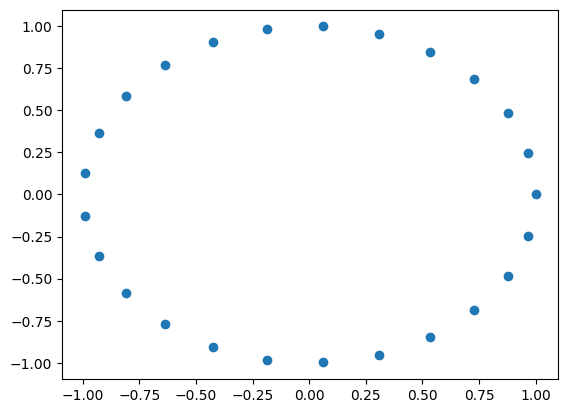

In [3]:
points = generate_points(25)

plt.scatter(points[..., 0], points[..., 1])

In [4]:
def get_pos(cities: np.ndarray, route: list):
    """
    Візуалізація маршруту.
    """
    res = []
    for city in cities[route]:
        res.append(city)
    res.append(res[0])
    return np.array(res)

In [5]:
def animate(name: str, cities: np.ndarray, best_routes: list, history: list):
    fig, ax = plt.subplots()
    
    def init():
        ax.scatter(cities[..., 0],
                cities[..., 1], 
                color='blue', 
                label='Міста')
        return [ax]

    def update(frame):
        pos = get_pos(cities, best_routes[frame])
        
        ax.clear()
        
        ax.scatter(cities[..., 0],
                cities[..., 1], 
                color='blue', 
                label='Міста')
        
        ax.plot(pos[..., 0],
                pos[..., 1], 
                color='red', 
                label='Маршрут')
        
        ax.title.set_text(f"Покоління {frame*10} | Довжина маршрута: {history[frame*10]:.2f}")
        

        return [ax]


    # Створення анімації
    ani = FuncAnimation(
                        fig, 
                        update, 
                        init_func=init,
                        frames=range(len(best_routes)), 
                        interval=50
                        )

    ani.save(name, fps = 12)

## Коло 30

### Генетичний алгоритм

Generation 0: Best Distance = 34.11
Generation 10: Best Distance = 26.28
Generation 20: Best Distance = 25.09
Generation 30: Best Distance = 25.09
Generation 40: Best Distance = 24.36
Generation 50: Best Distance = 24.36
Generation 60: Best Distance = 24.09
Generation 70: Best Distance = 22.69
Generation 80: Best Distance = 22.31
Generation 90: Best Distance = 22.31
Generation 100: Best Distance = 22.31
Generation 110: Best Distance = 22.31
Generation 120: Best Distance = 22.31
Generation 130: Best Distance = 21.73
Generation 140: Best Distance = 21.73
Generation 150: Best Distance = 19.48
Generation 160: Best Distance = 19.48
Generation 170: Best Distance = 19.48
Generation 180: Best Distance = 19.48
Generation 190: Best Distance = 19.34
Generation 200: Best Distance = 18.95
Generation 210: Best Distance = 18.95
Generation 220: Best Distance = 18.69
Generation 230: Best Distance = 18.69
Generation 240: Best Distance = 18.69
Generation 250: Best Distance = 18.69
Generation 260: Best Di

c:\UnProg\AMSI\Lab 4\GA.py:112: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([ordered_cities[-1, 0], ordered_cities[0, 0]],


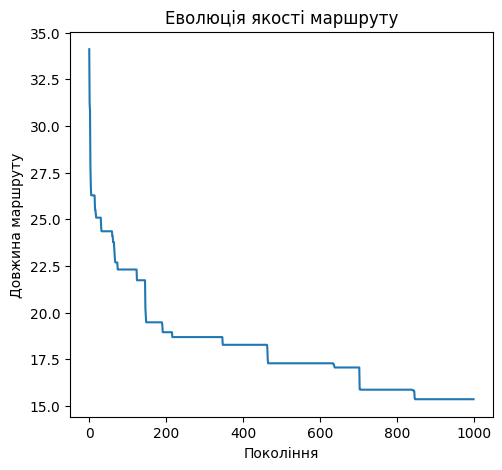

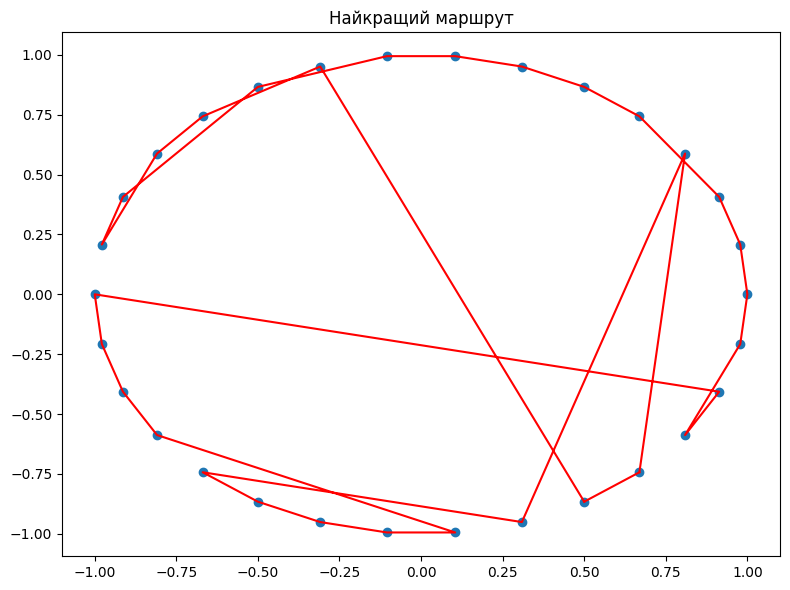

In [6]:
num_cities = 30
cities = generate_points(num_cities)

solver = TSPSolverGA(cities, population_size=20, generations=1000)
history, best_routes = solver.evolve()

# Візуалізація
best_route = solver.get_best_route()
plt.figure(figsize=(12, 5))

# Графік збіжності
plt.subplot(121)
plt.plot(history)
plt.title("Еволюція якості маршруту")
plt.xlabel("Покоління")
plt.ylabel("Довжина маршруту")

# Візуалізація маршруту
solver.plot_route()

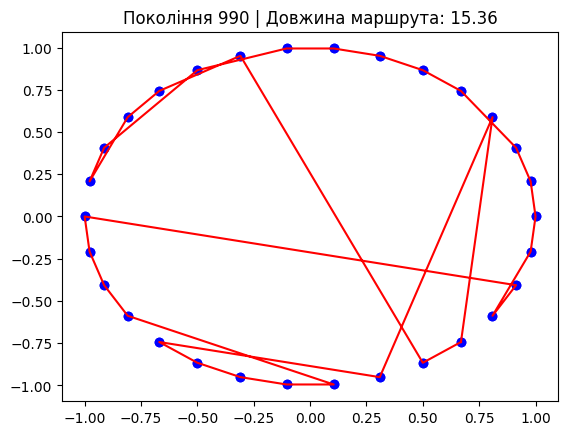

In [7]:
animate("tsp_animation_ga_с30.mp4", cities, best_routes, history)

### Мурашиний алгоритм

Iteration 0: Best Distance = 22.77
Iteration 10: Best Distance = 14.54
Iteration 20: Best Distance = 13.31
Iteration 30: Best Distance = 12.08
Iteration 40: Best Distance = 8.71
Iteration 50: Best Distance = 8.71
Iteration 60: Best Distance = 8.71
Iteration 70: Best Distance = 8.71
Iteration 80: Best Distance = 8.71
Iteration 90: Best Distance = 8.71
[np.float64(22.773370784149133), np.float64(22.773370784149133), np.float64(18.793713364446212), np.float64(18.793713364446212), np.float64(14.54145557318141), np.float64(14.54145557318141), np.float64(14.54145557318141), np.float64(14.54145557318141), np.float64(14.54145557318141), np.float64(14.54145557318141), np.float64(14.54145557318141), np.float64(14.54145557318141), np.float64(14.54145557318141), np.float64(14.54145557318141), np.float64(13.907961898468258), np.float64(13.312233915102551), np.float64(13.312233915102551), np.float64(13.312233915102551), np.float64(13.312233915102551), np.float64(13.312233915102551), np.float64(13.31

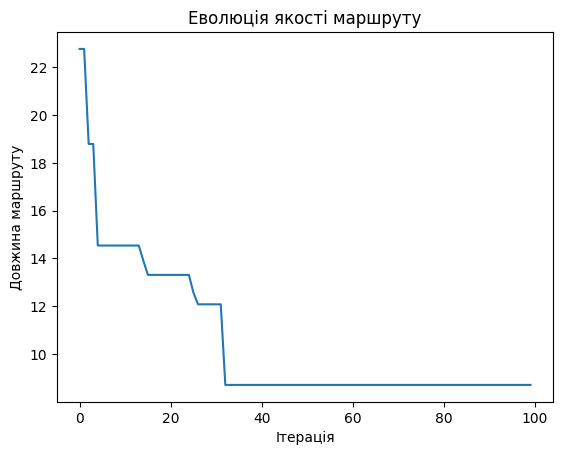

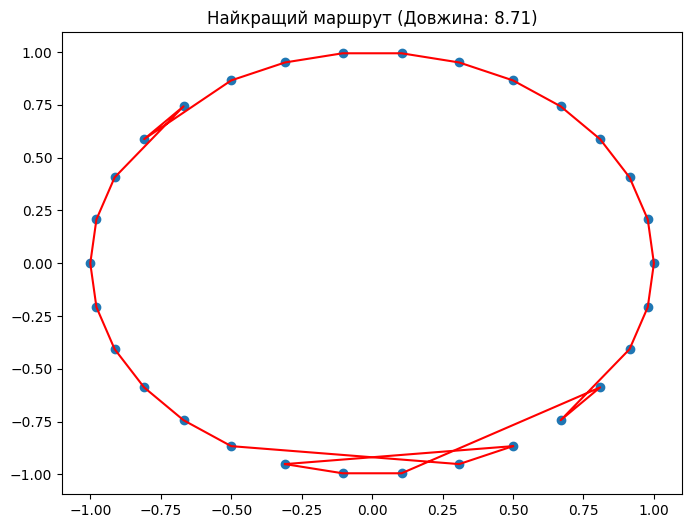

In [8]:
solver = TSPSolverACO(
    cities, 
    num_ants=5,
    iterations=100,

)
ant_history, ant_best_routes = solver.run()

# Візуалізація
print(ant_history)
plt.plot(ant_history)
plt.title("Еволюція якості маршруту")
plt.xlabel("Ітерація")
plt.ylabel("Довжина маршруту")
plt.show()

solver.plot_route()

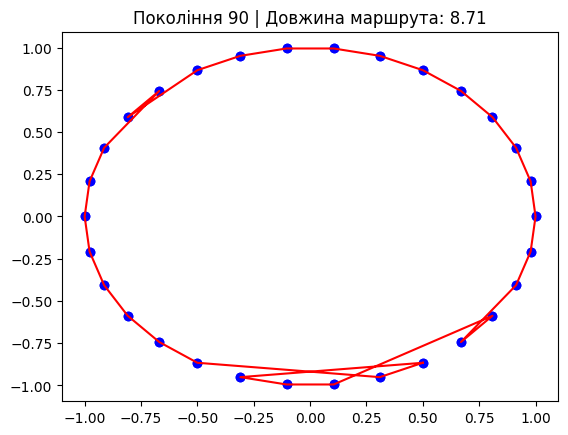

In [9]:
animate("tsp_animation_aco_с30.mp4", cities, ant_best_routes, ant_history)

## Коло 50

Generation 0: Best Distance = 57.06
Generation 10: Best Distance = 41.35
Generation 20: Best Distance = 41.34
Generation 30: Best Distance = 40.87
Generation 40: Best Distance = 40.87
Generation 50: Best Distance = 40.87
Generation 60: Best Distance = 40.87
Generation 70: Best Distance = 40.87
Generation 80: Best Distance = 40.80
Generation 90: Best Distance = 40.80
Generation 100: Best Distance = 40.13
Generation 110: Best Distance = 40.13
Generation 120: Best Distance = 40.13
Generation 130: Best Distance = 40.13
Generation 140: Best Distance = 40.13
Generation 150: Best Distance = 39.77
Generation 160: Best Distance = 39.22
Generation 170: Best Distance = 39.22
Generation 180: Best Distance = 36.92
Generation 190: Best Distance = 36.92
Generation 200: Best Distance = 36.92
Generation 210: Best Distance = 36.24
Generation 220: Best Distance = 36.24
Generation 230: Best Distance = 36.24
Generation 240: Best Distance = 36.24
Generation 250: Best Distance = 35.96
Generation 260: Best Di

c:\UnProg\AMSI\Lab 4\GA.py:112: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([ordered_cities[-1, 0], ordered_cities[0, 0]],


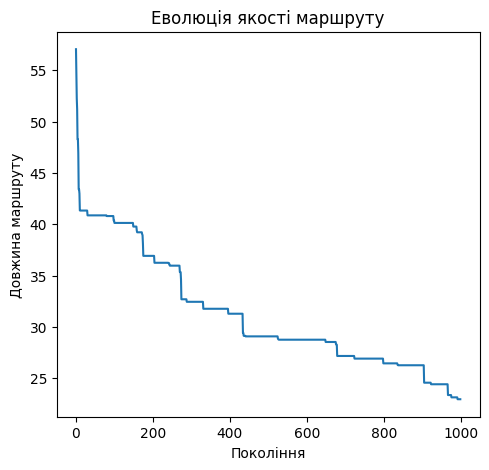

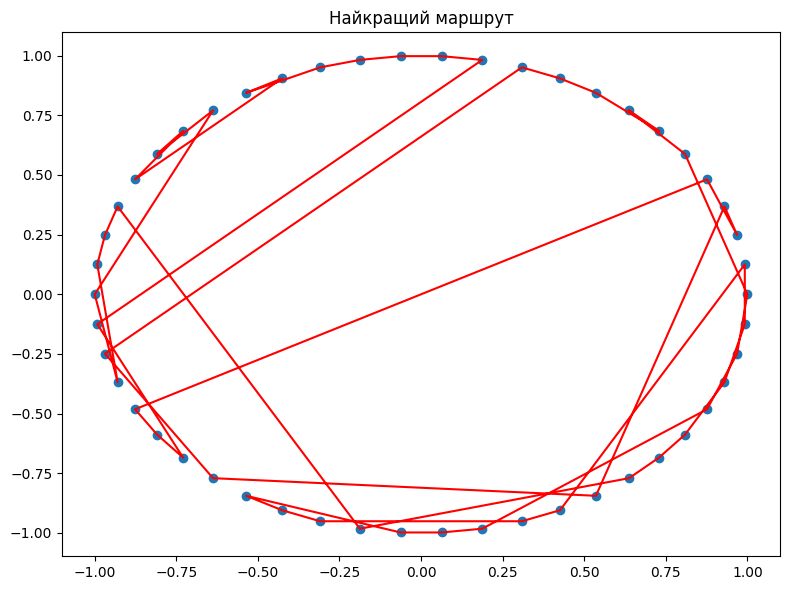

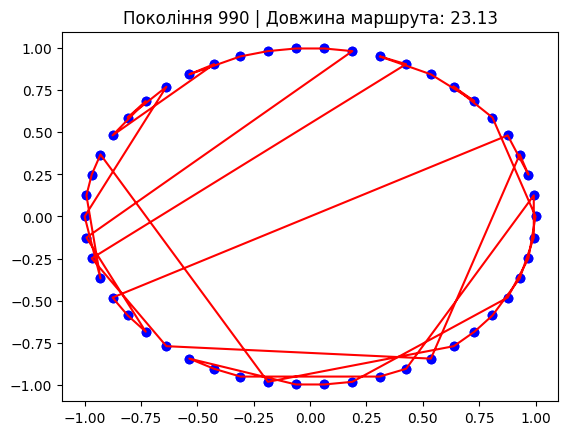

In [10]:
num_cities = 50
cities = generate_points(num_cities)

solver = TSPSolverGA(cities, population_size=20, generations=1000)
history, best_routes = solver.evolve()

# Візуалізація
best_route = solver.get_best_route()
plt.figure(figsize=(12, 5))

# Графік збіжності
plt.subplot(121)
plt.plot(history)
plt.title("Еволюція якості маршруту")
plt.xlabel("Покоління")
plt.ylabel("Довжина маршруту")

# Візуалізація маршруту
solver.plot_route()

animate("tsp_animation_ga_с50.mp4", cities, best_routes, history)

Iteration 0: Best Distance = 36.75
Iteration 10: Best Distance = 18.23
Iteration 20: Best Distance = 15.59
Iteration 30: Best Distance = 15.59
Iteration 40: Best Distance = 13.77
Iteration 50: Best Distance = 13.77
Iteration 60: Best Distance = 13.77
Iteration 70: Best Distance = 13.77
Iteration 80: Best Distance = 13.77
Iteration 90: Best Distance = 13.77
[np.float64(36.74592968031932), np.float64(33.837442720123526), np.float64(33.18152166630688), np.float64(29.74561787430861), np.float64(29.587288194050686), np.float64(27.068373763154682), np.float64(23.68927102313609), np.float64(23.68927102313609), np.float64(22.2022095276097), np.float64(22.2022095276097), np.float64(18.22856149424474), np.float64(18.22856149424474), np.float64(18.22856149424474), np.float64(17.728715176919682), np.float64(17.728715176919682), np.float64(17.728715176919682), np.float64(15.967560083469973), np.float64(15.967560083469973), np.float64(15.967560083469973), np.float64(15.59397732525463), np.float64(15

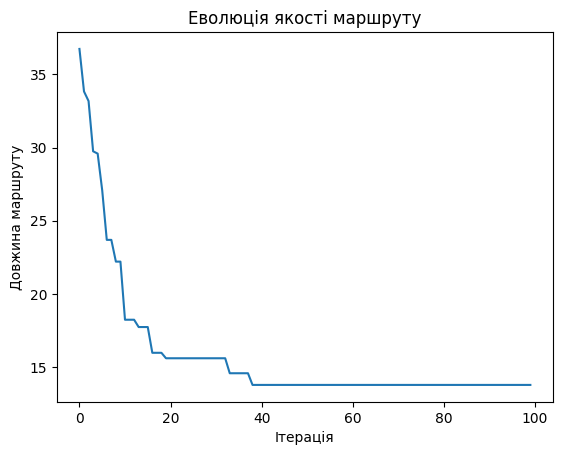

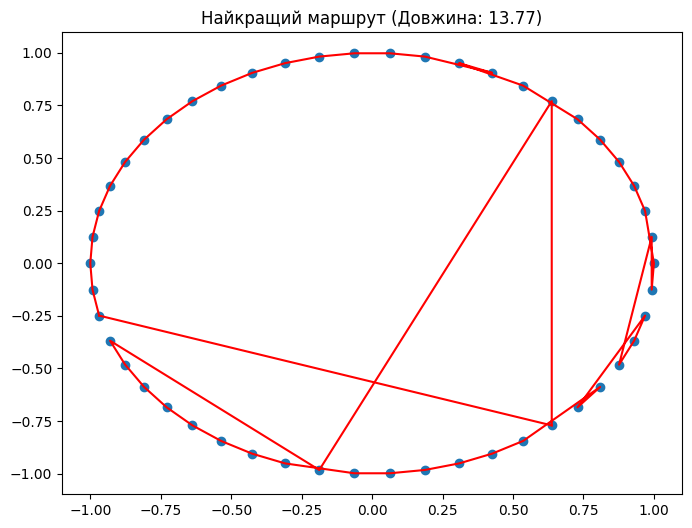

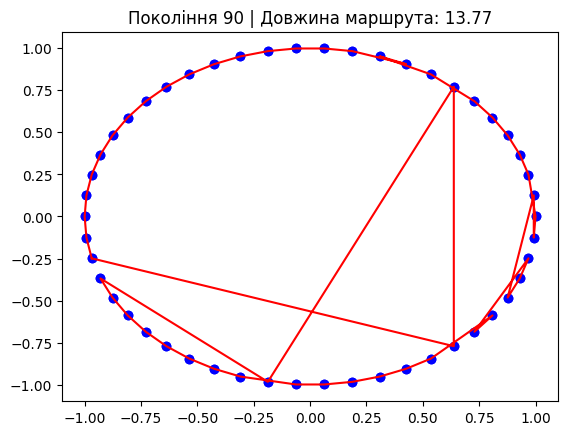

In [11]:
solver = TSPSolverACO(
    cities, 
    num_ants=5,
    iterations=100,

)
ant_history, ant_best_routes = solver.run()

# Візуалізація
print(ant_history)
plt.plot(ant_history)
plt.title("Еволюція якості маршруту")
plt.xlabel("Ітерація")
plt.ylabel("Довжина маршруту")
plt.show()

solver.plot_route()

animate("tsp_animation_aco_с50.mp4", cities, ant_best_routes, ant_history)

## Коло 100

Generation 0: Best Distance = 114.41
Generation 10: Best Distance = 99.23
Generation 20: Best Distance = 99.09
Generation 30: Best Distance = 94.75
Generation 40: Best Distance = 94.75
Generation 50: Best Distance = 94.64
Generation 60: Best Distance = 90.61
Generation 70: Best Distance = 87.58
Generation 80: Best Distance = 87.08
Generation 90: Best Distance = 87.08
Generation 100: Best Distance = 87.08
Generation 110: Best Distance = 87.08
Generation 120: Best Distance = 86.73
Generation 130: Best Distance = 85.87
Generation 140: Best Distance = 85.02
Generation 150: Best Distance = 84.85
Generation 160: Best Distance = 84.49
Generation 170: Best Distance = 82.94
Generation 180: Best Distance = 80.76
Generation 190: Best Distance = 79.56
Generation 200: Best Distance = 78.80
Generation 210: Best Distance = 78.74
Generation 220: Best Distance = 78.74
Generation 230: Best Distance = 78.74
Generation 240: Best Distance = 73.86
Generation 250: Best Distance = 73.82
Generation 260: Best D

c:\UnProg\AMSI\Lab 4\GA.py:112: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([ordered_cities[-1, 0], ordered_cities[0, 0]],


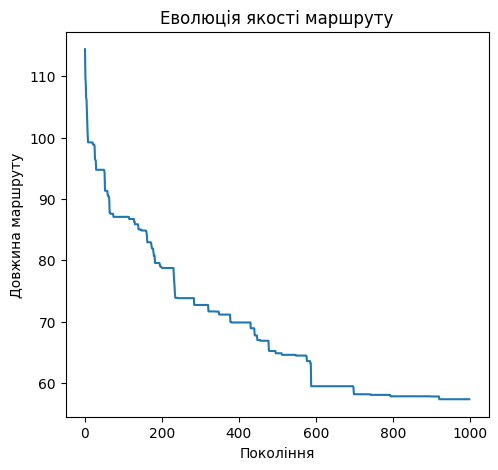

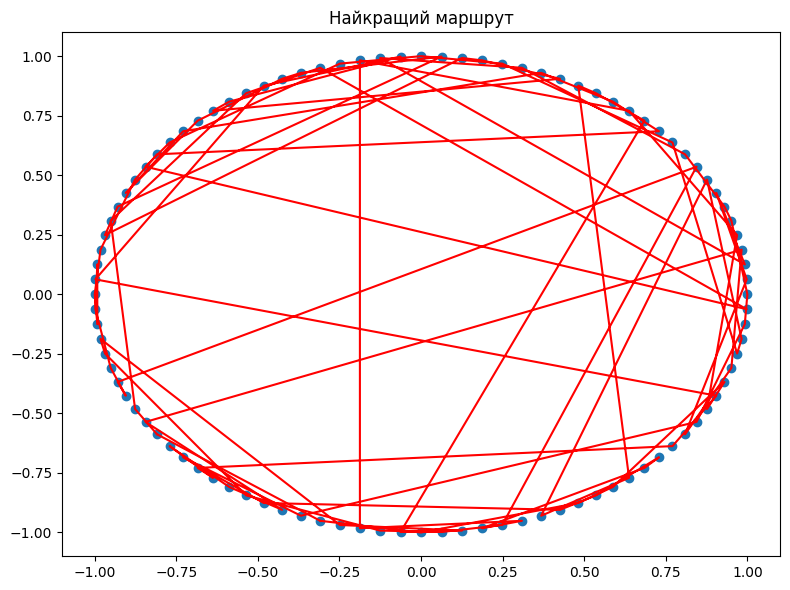

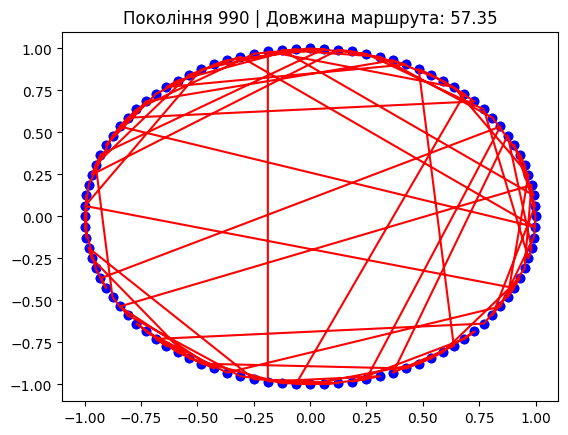

In [12]:
num_cities = 100
cities = generate_points(num_cities)

solver = TSPSolverGA(cities, population_size=20, generations=1000)
history, best_routes = solver.evolve()

# Візуалізація
best_route = solver.get_best_route()
plt.figure(figsize=(12, 5))

# Графік збіжності
plt.subplot(121)
plt.plot(history)
plt.title("Еволюція якості маршруту")
plt.xlabel("Покоління")
plt.ylabel("Довжина маршруту")

# Візуалізація маршруту
solver.plot_route()

animate("tsp_animation_ga_с100.mp4", cities, best_routes, history)

Iteration 0: Best Distance = 64.44
Iteration 10: Best Distance = 34.22
Iteration 20: Best Distance = 24.15
Iteration 30: Best Distance = 18.88
Iteration 40: Best Distance = 18.88
Iteration 50: Best Distance = 18.53
Iteration 60: Best Distance = 17.84
Iteration 70: Best Distance = 17.84
Iteration 80: Best Distance = 17.84
Iteration 90: Best Distance = 17.84
[np.float64(64.44034328138852), np.float64(61.91038767430421), np.float64(58.48673464217235), np.float64(52.59673173508441), np.float64(52.59673173508441), np.float64(49.93408702036573), np.float64(46.67382700068505), np.float64(42.135664717374034), np.float64(35.68882185225081), np.float64(34.6670945354433), np.float64(34.21925492106015), np.float64(27.80788728565516), np.float64(27.80788728565516), np.float64(27.80788728565516), np.float64(27.80788728565516), np.float64(24.987444293290675), np.float64(24.987444293290675), np.float64(24.987444293290675), np.float64(24.987444293290675), np.float64(24.94048640407574), np.float64(24.15

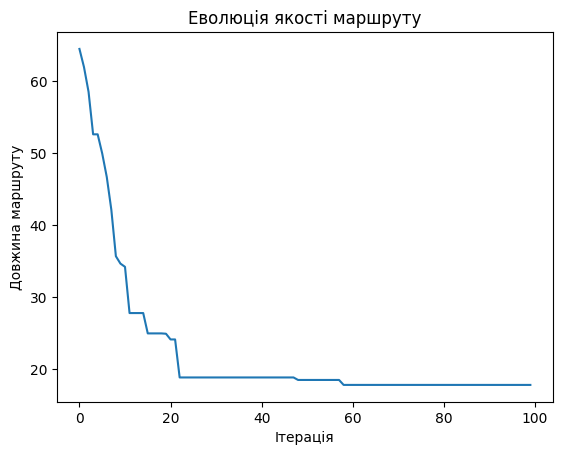

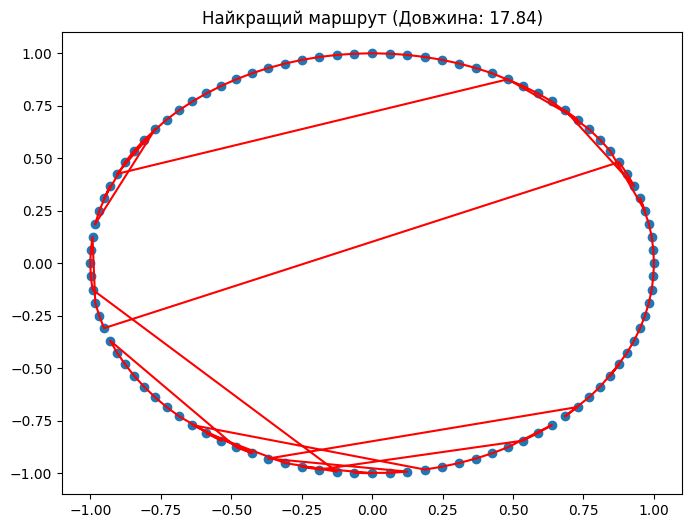

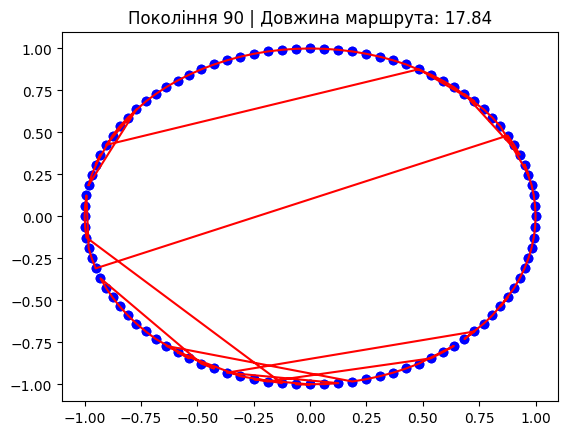

In [13]:
solver = TSPSolverACO(
    cities, 
    num_ants=5,
    iterations=100,

)
ant_history, ant_best_routes = solver.run()

# Візуалізація
print(ant_history)
plt.plot(ant_history)
plt.title("Еволюція якості маршруту")
plt.xlabel("Ітерація")
plt.ylabel("Довжина маршруту")
plt.show()

solver.plot_route()

animate("tsp_animation_aco_с100.mp4", cities, ant_best_routes, ant_history)

## Коло 200

Generation 0: Best Distance = 232.22
Generation 10: Best Distance = 213.49
Generation 20: Best Distance = 210.46
Generation 30: Best Distance = 206.57
Generation 40: Best Distance = 206.37
Generation 50: Best Distance = 205.89
Generation 60: Best Distance = 205.69
Generation 70: Best Distance = 205.57
Generation 80: Best Distance = 205.54
Generation 90: Best Distance = 202.63
Generation 100: Best Distance = 202.63
Generation 110: Best Distance = 201.16
Generation 120: Best Distance = 200.84
Generation 130: Best Distance = 200.84
Generation 140: Best Distance = 197.97
Generation 150: Best Distance = 197.81
Generation 160: Best Distance = 196.16
Generation 170: Best Distance = 196.16
Generation 180: Best Distance = 196.16
Generation 190: Best Distance = 195.79
Generation 200: Best Distance = 195.70
Generation 210: Best Distance = 193.12
Generation 220: Best Distance = 192.67
Generation 230: Best Distance = 189.84
Generation 240: Best Distance = 189.84
Generation 250: Best Distance = 188.

c:\UnProg\AMSI\Lab 4\GA.py:112: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([ordered_cities[-1, 0], ordered_cities[0, 0]],


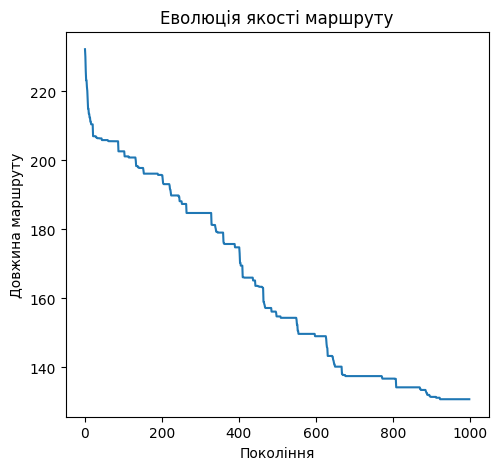

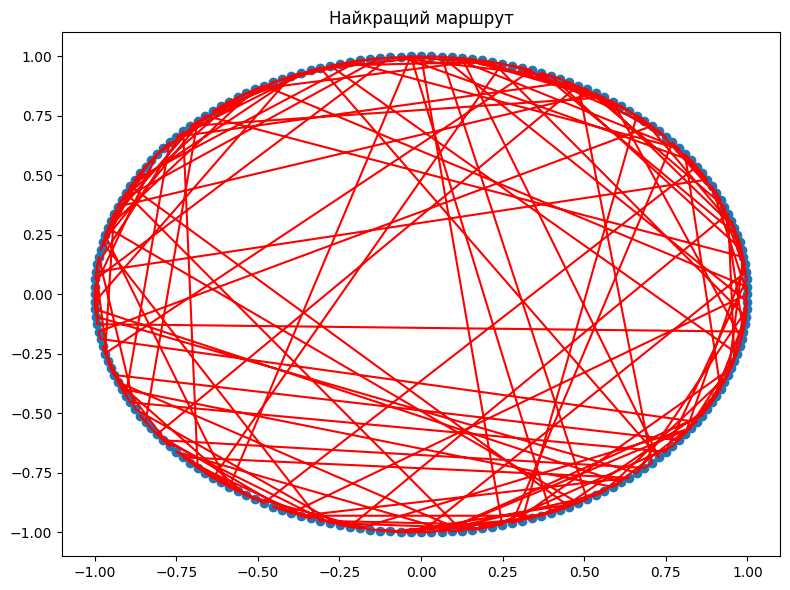

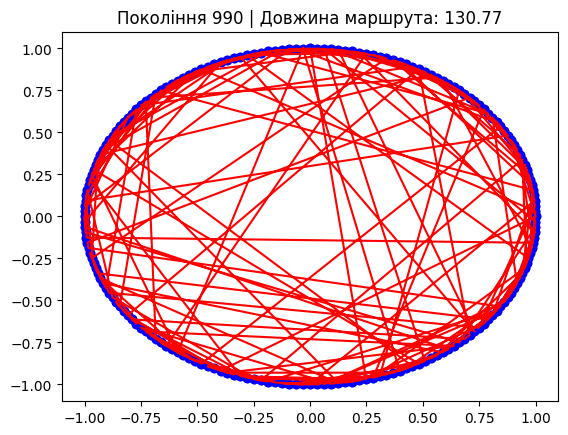

In [14]:
num_cities = 200
cities = generate_points(num_cities)

solver = TSPSolverGA(cities, population_size=20, generations=1000)
history, best_routes = solver.evolve()

# Візуалізація
best_route = solver.get_best_route()
plt.figure(figsize=(12, 5))

# Графік збіжності
plt.subplot(121)
plt.plot(history)
plt.title("Еволюція якості маршруту")
plt.xlabel("Покоління")
plt.ylabel("Довжина маршруту")

# Візуалізація маршруту
solver.plot_route()

animate("tsp_animation_ga_с200.mp4", cities, best_routes, history)

Iteration 0: Best Distance = 104.93
Iteration 10: Best Distance = 49.95
Iteration 20: Best Distance = 31.73
Iteration 30: Best Distance = 26.95
Iteration 40: Best Distance = 26.95
Iteration 50: Best Distance = 26.95
Iteration 60: Best Distance = 26.95
Iteration 70: Best Distance = 26.95
Iteration 80: Best Distance = 26.95
Iteration 90: Best Distance = 26.95
[np.float64(104.93162659918889), np.float64(104.93162659918889), np.float64(104.77145868089539), np.float64(97.35984800901853), np.float64(91.30454916471425), np.float64(85.6346305441802), np.float64(79.26170690130125), np.float64(68.3535215120729), np.float64(61.590743014108575), np.float64(57.790866378139356), np.float64(49.952286280436155), np.float64(48.31474452543401), np.float64(43.96662380049908), np.float64(43.26280303938372), np.float64(36.114527268585164), np.float64(35.463857841294256), np.float64(34.374739042251704), np.float64(34.374739042251704), np.float64(34.374739042251704), np.float64(31.7291937538845), np.float64(

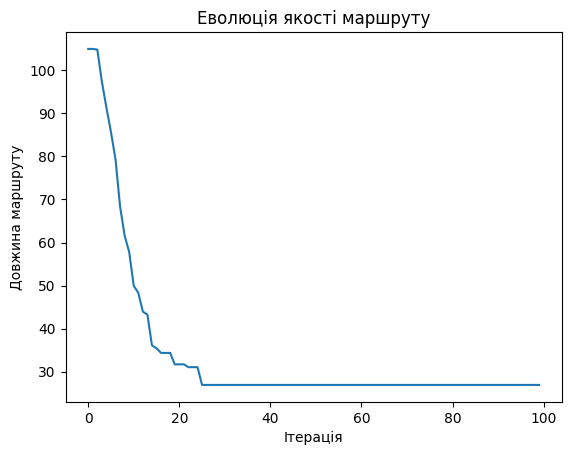

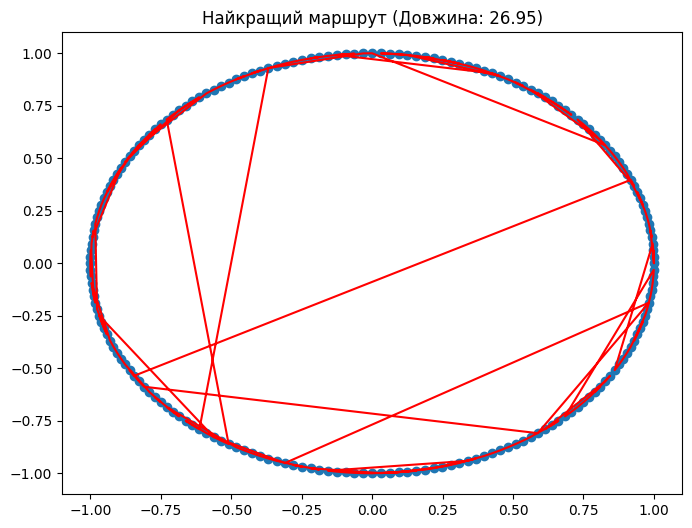

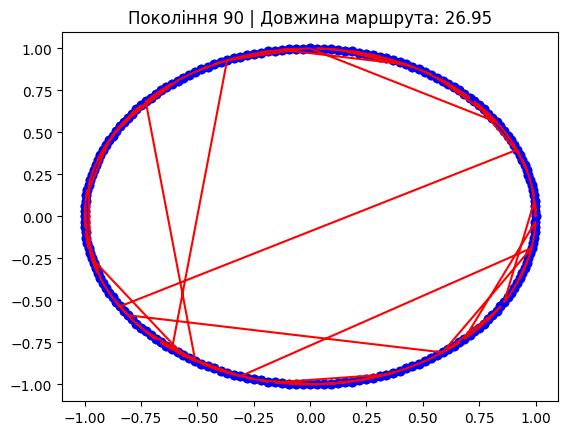

In [15]:
solver = TSPSolverACO(
    cities, 
    num_ants=5,
    iterations=100,

)
ant_history, ant_best_routes = solver.run()

# Візуалізація
print(ant_history)
plt.plot(ant_history)
plt.title("Еволюція якості маршруту")
plt.xlabel("Ітерація")
plt.ylabel("Довжина маршруту")
plt.show()

solver.plot_route()

animate("tsp_animation_aco_с200.mp4", cities, ant_best_routes, ant_history)

## PBM436

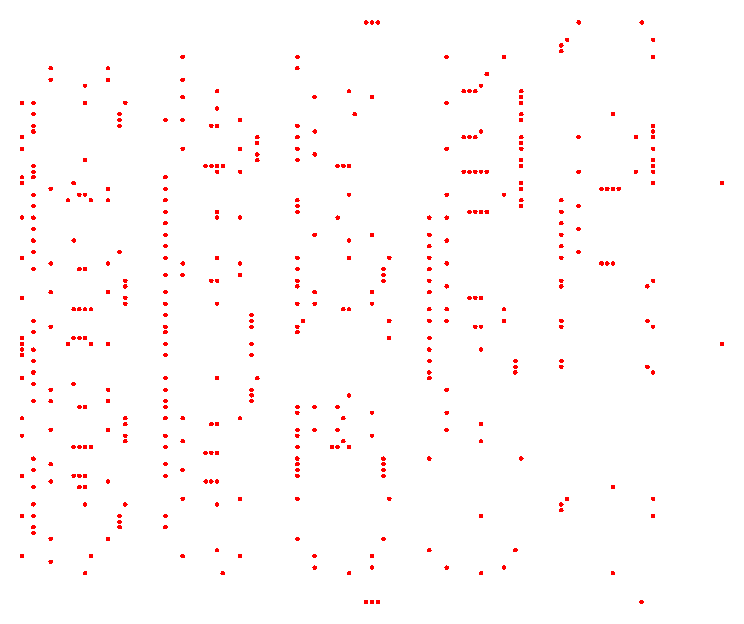

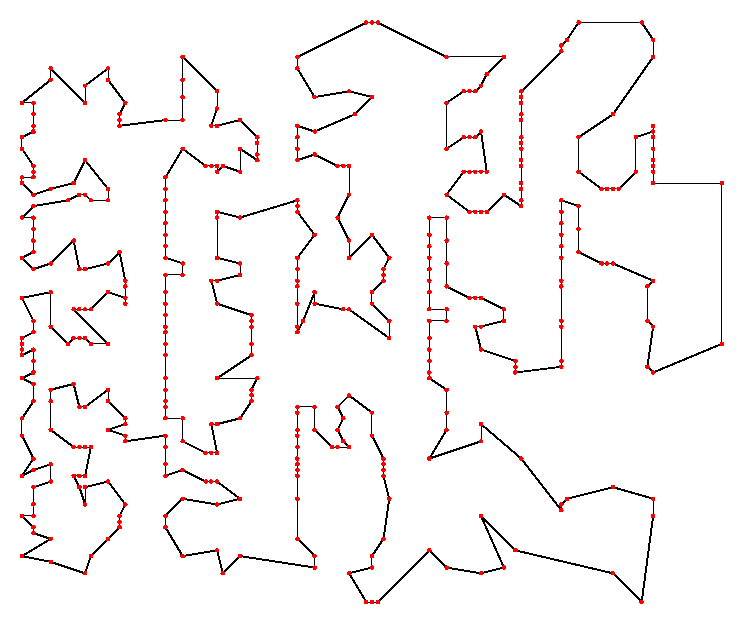

In [16]:
def parse_tsp_file(file_path):
    """
    Parse a .tsp file and extract the coordinates of cities.
    """
    with open(file_path, 'r') as file:
        lines = file.readlines()

    coordinates = []

    for line in lines:
        parts = line.split()
        if len(parts) >= 3:
            _, x, y = parts
            coordinates.append((float(x), float(y)))

    return np.array(coordinates)

In [17]:
cities = parse_tsp_file("pbm436.tsp")

Generation 0: Best Distance = 21795.42
Generation 10: Best Distance = 20682.05
Generation 20: Best Distance = 19205.98
Generation 30: Best Distance = 17925.76
Generation 40: Best Distance = 17289.93
Generation 50: Best Distance = 16875.14
Generation 60: Best Distance = 16612.54
Generation 70: Best Distance = 16449.81
Generation 80: Best Distance = 16241.23
Generation 90: Best Distance = 15891.39
Generation 100: Best Distance = 15568.89
Generation 110: Best Distance = 15320.11
Generation 120: Best Distance = 15258.03
Generation 130: Best Distance = 15082.62
Generation 140: Best Distance = 14824.61
Generation 150: Best Distance = 14719.73
Generation 160: Best Distance = 14616.45
Generation 170: Best Distance = 14410.93
Generation 180: Best Distance = 14238.95
Generation 190: Best Distance = 14214.71
Generation 200: Best Distance = 14209.28
Generation 210: Best Distance = 14186.59
Generation 220: Best Distance = 14072.12
Generation 230: Best Distance = 14013.86
Generation 240: Best Distan

c:\UnProg\AMSI\Lab 4\GA.py:112: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([ordered_cities[-1, 0], ordered_cities[0, 0]],


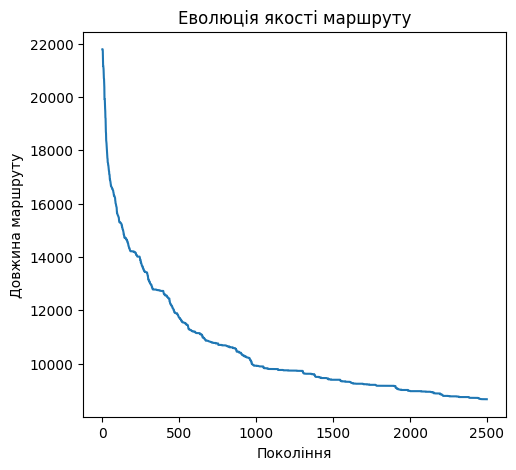

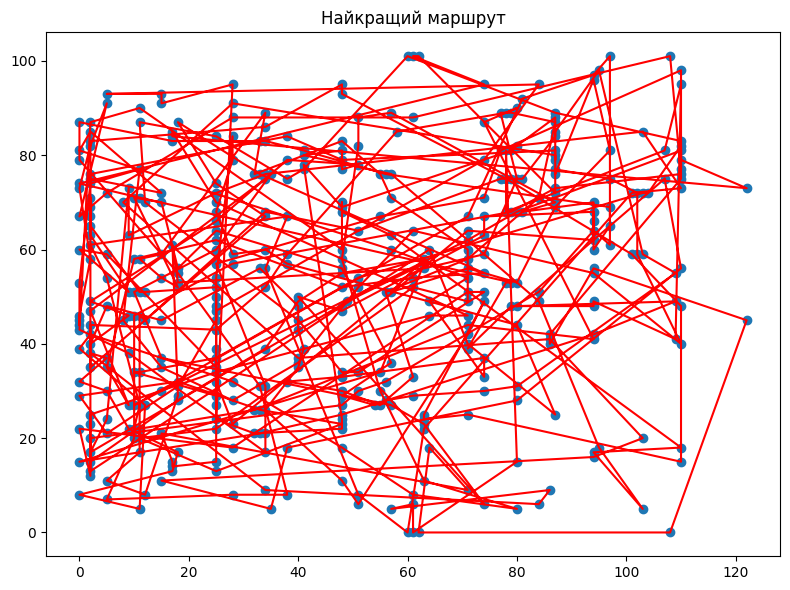

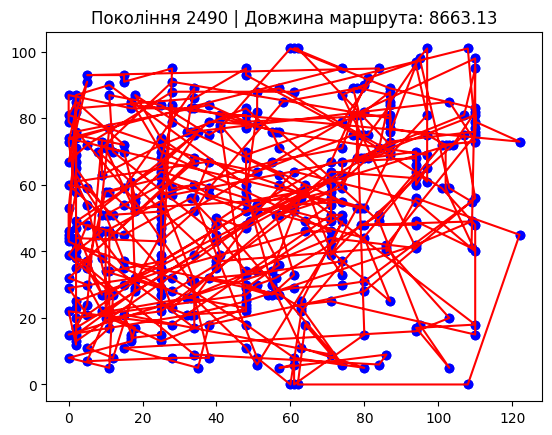

In [18]:
solver = TSPSolverGA(cities, population_size=100, generations=2500)
history, best_routes = solver.evolve()

# Візуалізація
best_route = solver.get_best_route()
plt.figure(figsize=(12, 5))

# Графік збіжності
plt.subplot(121)
plt.plot(history)
plt.title("Еволюція якості маршруту")
plt.xlabel("Покоління")
plt.ylabel("Довжина маршруту")

# Візуалізація маршруту
solver.plot_route()

animate("tsp_animation_ga_pbm436.mp4", cities, best_routes, history)

Iteration 0: Best Distance = 14135.83
Iteration 10: Best Distance = 10792.86
Iteration 20: Best Distance = 5500.78
Iteration 30: Best Distance = 4358.49
Iteration 40: Best Distance = 4032.22
Iteration 50: Best Distance = 3930.80
Iteration 60: Best Distance = 3780.74
Iteration 70: Best Distance = 3780.74
Iteration 80: Best Distance = 3780.74
Iteration 90: Best Distance = 3612.61
Iteration 100: Best Distance = 3612.61
Iteration 110: Best Distance = 3612.61
Iteration 120: Best Distance = 3612.61
Iteration 130: Best Distance = 3612.61
Iteration 140: Best Distance = 3612.61
Iteration 150: Best Distance = 3612.61
Iteration 160: Best Distance = 3612.61
Iteration 170: Best Distance = 3612.61
Iteration 180: Best Distance = 3612.61
Iteration 190: Best Distance = 3612.61
Iteration 200: Best Distance = 3612.61
Iteration 210: Best Distance = 3612.61
Iteration 220: Best Distance = 3612.61
Iteration 230: Best Distance = 3612.61
Iteration 240: Best Distance = 3612.61
[np.float64(14135.833031671082), n

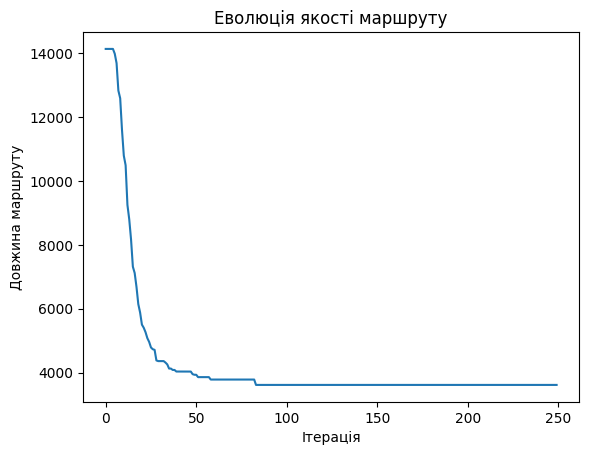

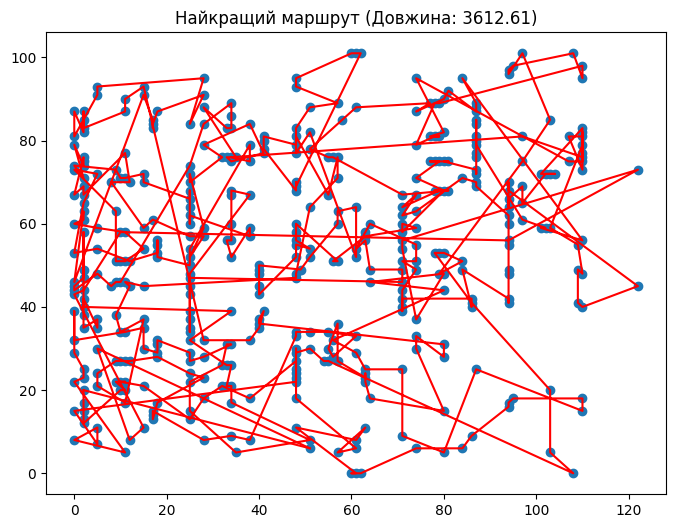

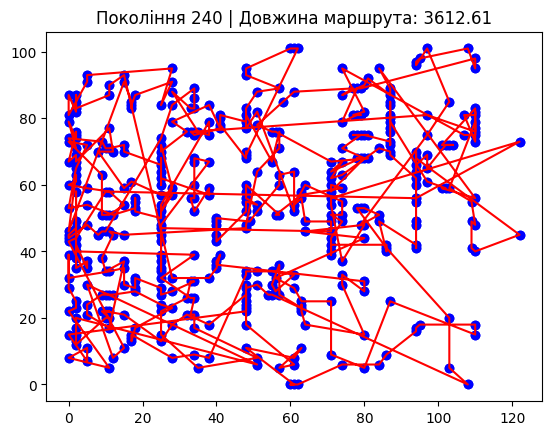

In [19]:
solver = TSPSolverACO(
    cities, 
    num_ants=25,
    iterations=250,

)
ant_history, ant_best_routes = solver.run()

# Візуалізація
print(ant_history)
plt.plot(ant_history)
plt.title("Еволюція якості маршруту")
plt.xlabel("Ітерація")
plt.ylabel("Довжина маршруту")
plt.show()

solver.plot_route()

animate("tsp_animation_aco_pbm436.mp4", cities, ant_best_routes, ant_history)

## XQL662

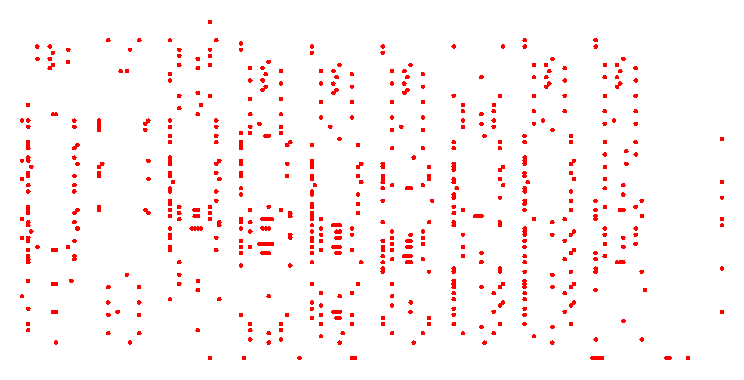

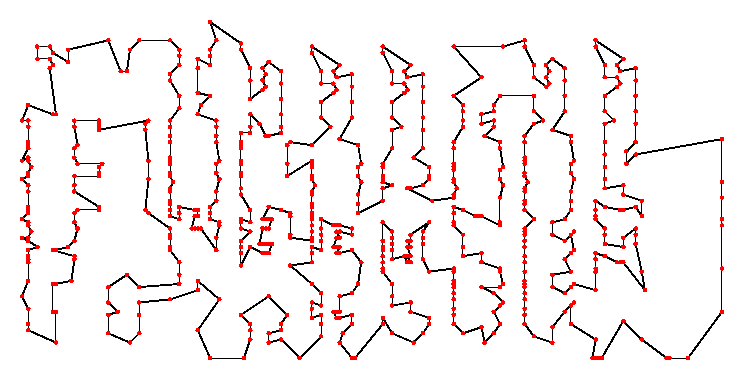

In [20]:
cities = parse_tsp_file("xql662.tsp")

Generation 0: Best Distance = 49359.84
Generation 10: Best Distance = 46882.71
Generation 20: Best Distance = 43644.37
Generation 30: Best Distance = 41087.21
Generation 40: Best Distance = 39551.31
Generation 50: Best Distance = 38501.30
Generation 60: Best Distance = 37119.70
Generation 70: Best Distance = 35926.93
Generation 80: Best Distance = 35251.95
Generation 90: Best Distance = 35003.20
Generation 100: Best Distance = 34722.42
Generation 110: Best Distance = 34314.99
Generation 120: Best Distance = 33594.22
Generation 130: Best Distance = 33071.92
Generation 140: Best Distance = 32546.95
Generation 150: Best Distance = 31961.92
Generation 160: Best Distance = 31638.01
Generation 170: Best Distance = 31109.04
Generation 180: Best Distance = 30752.36
Generation 190: Best Distance = 30443.13
Generation 200: Best Distance = 30080.90
Generation 210: Best Distance = 29878.47
Generation 220: Best Distance = 29740.12
Generation 230: Best Distance = 29310.75
Generation 240: Best Distan

c:\UnProg\AMSI\Lab 4\GA.py:112: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([ordered_cities[-1, 0], ordered_cities[0, 0]],


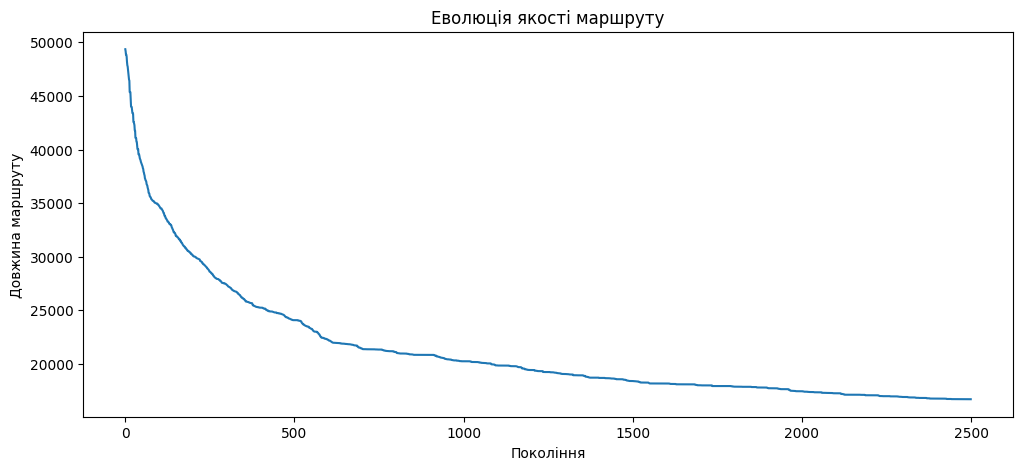

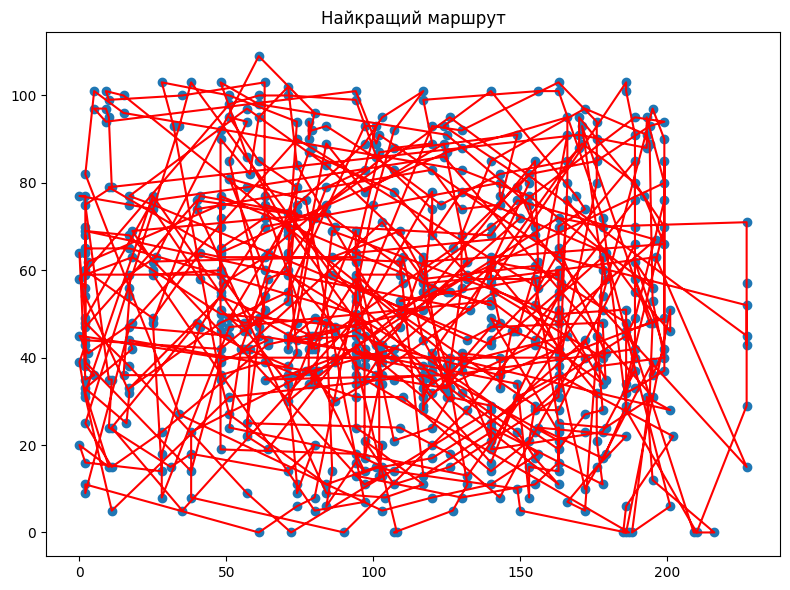

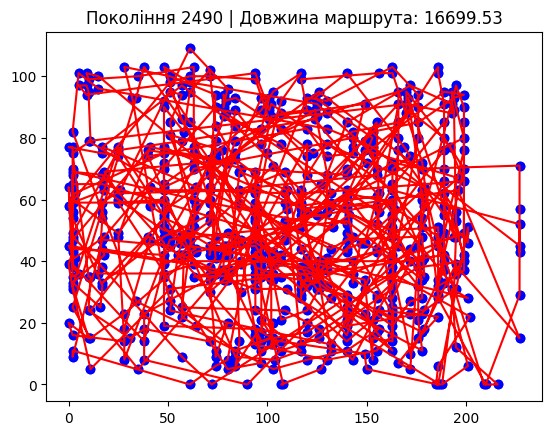

In [21]:
solver = TSPSolverGA(cities, population_size=200, generations=2500)
history, best_routes = solver.evolve()

# Візуалізація
best_route = solver.get_best_route()
plt.figure(figsize=(12, 5))

# Графік збіжності
plt.plot(history)
plt.title("Еволюція якості маршруту")
plt.xlabel("Покоління")
plt.ylabel("Довжина маршруту")

# Візуалізація маршруту
solver.plot_route()

animate("tsp_animation_ga_xql662.mp4", cities, best_routes, history)

Iteration 0: Best Distance = 31783.47
Iteration 10: Best Distance = 22535.37
Iteration 20: Best Distance = 13072.95
Iteration 30: Best Distance = 9847.45
Iteration 40: Best Distance = 8866.13
Iteration 50: Best Distance = 8719.25
Iteration 60: Best Distance = 8457.98
Iteration 70: Best Distance = 8249.42
Iteration 80: Best Distance = 7835.99
Iteration 90: Best Distance = 7835.99
Iteration 100: Best Distance = 7835.99
Iteration 110: Best Distance = 7835.99
Iteration 120: Best Distance = 7835.99
Iteration 130: Best Distance = 7827.56
Iteration 140: Best Distance = 7827.56
Iteration 150: Best Distance = 7827.56
Iteration 160: Best Distance = 7827.56
Iteration 170: Best Distance = 7827.56
Iteration 180: Best Distance = 7827.56
Iteration 190: Best Distance = 7827.56
Iteration 200: Best Distance = 7827.56
Iteration 210: Best Distance = 7827.56
Iteration 220: Best Distance = 7827.56
Iteration 230: Best Distance = 7827.56
Iteration 240: Best Distance = 7827.56
Iteration 250: Best Distance = 78

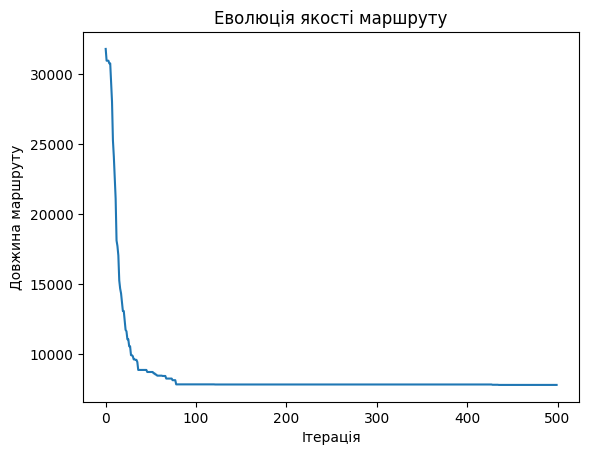

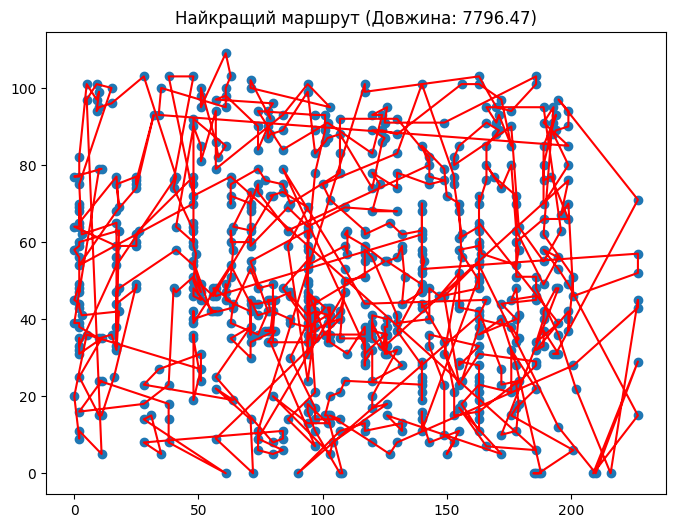

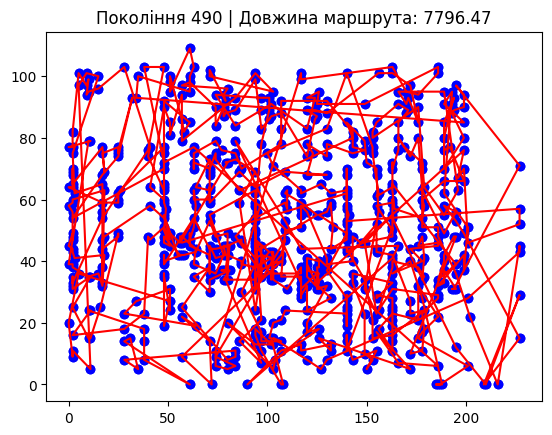

In [22]:
solver = TSPSolverACO(
    cities, 
    num_ants=100,
    iterations=500,

)
ant_history, ant_best_routes = solver.run()

# Візуалізація
print(ant_history)
plt.plot(ant_history)
plt.title("Еволюція якості маршруту")
plt.xlabel("Ітерація")
plt.ylabel("Довжина маршруту")
plt.show()

solver.plot_route()

animate("tsp_animation_aco_xql662.mp4", cities, ant_best_routes, ant_history)